In [1]:
import pandas as pd
import tensorflow as tf

url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
csv_path = tf.keras.utils.get_file("twitter_sentiment.csv", url)
df = pd.read_csv(csv_path)

df = df[["tweet", "label"]]


3103165/3103165 [==============================] - 50s 16us/step


In [2]:
df

,tweet,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
...,...,...
31957,ate @user isz that youuu?ðððððð...,0
31958,to see nina turner on the airwaves trying to...,0
31959,listening to sad songs on a monday morning otw...,0
31960,"@user #sikh #temple vandalised in in #calgary,...",1


In [3]:
print(f"Número de ejemplos: {len(df)}")
print(df["label"].value_counts())

Número de ejemplos: 31962
label
0    29720
1     2242
Name: count, dtype: int64


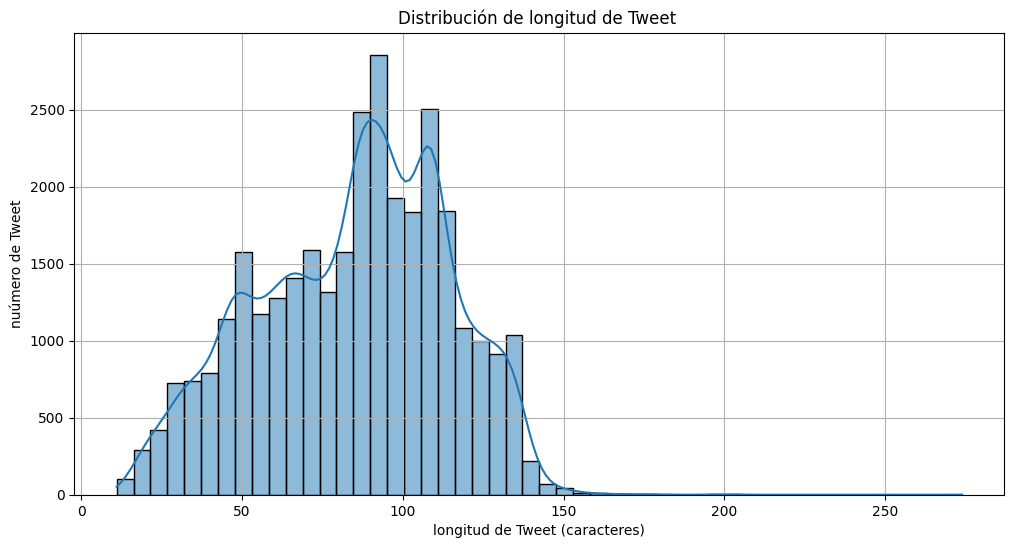

count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: tweet_length, dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


df['tweet_length'] = df['tweet'].str.len()


plt.figure(figsize=(12, 6))
sns.histplot(df['tweet_length'], kde=True, bins=50)  # Increased bins for more detail
plt.title('Distribución de longitud de Tweet ')
plt.xlabel('longitud de Tweet (caracteres)')
plt.ylabel('nuúmero de Tweet')
plt.grid(True)
plt.show()


print(df['tweet_length'].describe())


In [6]:
import re

In [7]:
def limpiar_texto(texto):
    texto = re.sub(r"@[A-Za-z0-9_]+", "", texto)               # menciones
    texto = re.sub(r"#", "", texto)                            # hashtags
    texto = re.sub(r"https?://[A-Za-z0-9./]+", "", texto)      # URLs
    texto = re.sub(r"[^a-zA-Z']", " ", texto)                  # caracteres no alfabéticos
    texto = texto.lower().strip()                              # minúsculas y espacios
    return texto

df["tweet"] = df["tweet"].apply(limpiar_texto)

In [8]:
df["tweet"]

0        when a father is dysfunctional and is so selfi...
1        thanks for lyft credit i can't use cause they ...
2                                      bihday your majesty
3          model   i love u take with u all the time in ur
4                    factsguide  society now    motivation
                               ...                        
31957                                  ate  isz that youuu
31958    to see nina turner on the airwaves trying to w...
31959    listening to sad songs on a monday morning otw...
31960    sikh temple vandalised in in calgary  wso cond...
31961                            thank you  for you follow
Name: tweet, Length: 31962, dtype: object